In [1]:
#1. Importing Libraries 
## 1. Used For Data Analysis
import pandas as pd 

## 2. Data Visualization and Interactive plots
import seaborn as sns

## 3. Make Graphic Plot
import matplotlib.pyplot as plt

## 4. Give Some Functions That Can Make It Easier for Processing Data
import numpy as np

## 5. Data Splitting For Train and Test data
from sklearn.model_selection import train_test_split 


##6. Transform Non Numerical To Numerical labels
from sklearn.preprocessing import LabelEncoder

## 7. Normalizing Variables 
from sklearn.preprocessing import StandardScaler


## 8. Logistic Regression Model
from sklearn.linear_model import LogisticRegression

## 9. Decision Tree Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

## 10. Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB 

## 11. Random Forest Model
from sklearn.ensemble import RandomForestClassifier 

## 12. ROC Score
from sklearn.metrics import roc_auc_score 

## 13. Select Best Feature 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2



In [2]:
## Expand display to see more columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#2. Training Application Data Description

app_train = pd.read_csv("Downloads/exam/home-credit-default-risk/application_train.csv", sep=',')
print('Traning Application dataset has %d rows dan %d columns.' % app_train.shape)
app_train.head()

Traning Application dataset has 307511 rows dan 122 columns.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# 3. Testing Application Data Description

app_test = pd.read_csv("Downloads/exam/home-credit-default-risk/application_test.csv", sep=',')
print('Testing Application dataset has %d rows dan %d columns.' % app_test.shape)
app_test.head()

Testing Application dataset has 48744 rows dan 121 columns.


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170,-812,NaN,1,1,0,1,0,1,NaN,2,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175,-3503,5.0,1,1,0,1,0,0,Drivers,2,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment

In [5]:
# Analyzing Training Data Target
decode_map = {0: "Clients with No Payment Difficulties", 1: "Client with Payment Difficulties"}

def decode_sentiment(label):
    return decode_map[int(label)]

app_train['TARGET'] = app_train['TARGET'].apply(lambda x: decode_sentiment(x))

In [6]:
# Visualization Client with Payment difficulties and Client with no Payment Difficulties 

client_pay_cat = (app_train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

client_pay_cat.style.background_gradient(cmap='Greens')

,TARGET,COUNT
0,Client with Payment Difficulties,24825
1,Clients with No Payment Difficulties,282686


In [7]:
diff_to_pay = app_train[app_train['TARGET'] == "Client with Payment Difficulties"]
diff_to_pay.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Client with Payment Difficulties,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,Client with Payment Difficulties,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,Client with Payment Difficulties,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.94

In [8]:
gender_diffpay = (diff_to_pay[['CODE_GENDER']]
                .groupby("CODE_GENDER")
                .agg(COUNT=("CODE_GENDER","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

gender_diffpay.style.background_gradient(cmap='Greens')

,CODE_GENDER,COUNT
0,M,10655
1,F,14170


In [9]:
contract_diffpay = (diff_to_pay[['NAME_CONTRACT_TYPE']]
                .groupby("NAME_CONTRACT_TYPE")
                .agg(COUNT=("NAME_CONTRACT_TYPE","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

contract_diffpay.style.background_gradient(cmap='Greens')

,NAME_CONTRACT_TYPE,COUNT
0,Revolving loans,1604
1,Cash loans,23221


In [10]:
flagowncar_diffpay = (diff_to_pay[['FLAG_OWN_CAR']]
                .groupby("FLAG_OWN_CAR")
                .agg(COUNT=("FLAG_OWN_CAR","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

flagowncar_diffpay.style.background_gradient(cmap='Greens')

,FLAG_OWN_CAR,COUNT
0,Y,7576
1,N,17249


In [11]:

nameincometype_diffpay = (diff_to_pay[['NAME_INCOME_TYPE']]
                .groupby("NAME_INCOME_TYPE")
                .agg(COUNT=("NAME_INCOME_TYPE","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

nameincometype_diffpay.style.background_gradient(cmap='Greens')

,NAME_INCOME_TYPE,COUNT
0,Maternity leave,2
1,Unemployed,8
2,State servant,1249
3,Pensioner,2982
4,Commercial associate,5360
5,Working,15224


In [12]:

namefamilystatus_diffpay = (diff_to_pay[['NAME_FAMILY_STATUS']]
                .groupby("NAME_FAMILY_STATUS")
                .agg(COUNT=("NAME_FAMILY_STATUS","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

namefamilystatus_diffpay.style.background_gradient(cmap='Greens')

,NAME_FAMILY_STATUS,COUNT
0,Widow,937
1,Separated,1620
2,Civil marriage,2961
3,Single / not married,4457
4,Married,14850


In [13]:

familymembers_diffpay = (diff_to_pay[['CNT_FAM_MEMBERS']]
                .groupby("CNT_FAM_MEMBERS")
                .agg(COUNT=("CNT_FAM_MEMBERS","count"))
                .sort_values(by=["COUNT"],ascending=True)
                .reset_index())

familymembers_diffpay.style.background_gradient(cmap='Greens')

,CNT_FAM_MEMBERS,COUNT
0,10.000000,1
1,11.000000,1
2,13.000000,1
3,7.000000,6
4,8.000000,6
5,6.000000,55
6,5.000000,327
7,4.000000,2136
8,3.000000,4608
9,1.000000,5675


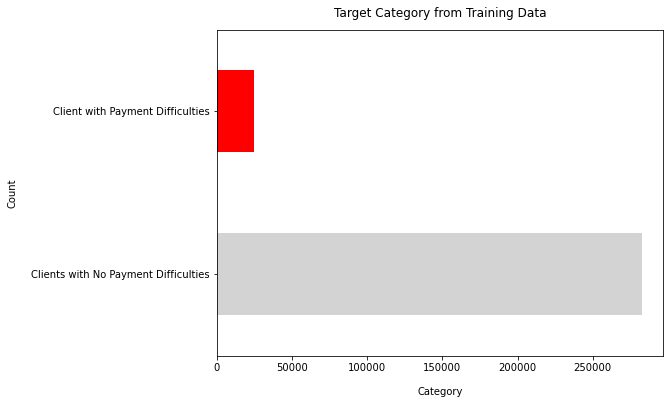

In [14]:
# Visualization with Horizontal Bar with Payment Difficulties and No Payment Difficulties

app_train['TARGET'].value_counts().plot(kind='barh', figsize=(8,6),color= ['lightgrey','red']);
plt.xlabel("Category", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Category from Training Data", y=1.02);

In [15]:
# Check Wheterr There is NA Data
print(app_train.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [16]:
# Detecting Percentage of Missing Value
missing_value =pd.DataFrame(app_train.isnull().sum(), columns=['Total Missing Value'])
missing_value['Missing Value Percentage'] = (missing_value['Total Missing Value']/app_train.shape[0])*100
missing_value.sort_values(by=['Missing Value Percentage'], ascending=False).reset_index()

,index,Total Missing Value,Missing Value Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [17]:
app_train.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
                'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
                'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG',
                'LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
                'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE',
                'LANDAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE',
                'EXT_SOURCE_1','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI',
                'ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE',
                'APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI',
                'ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE',
                'LIVINGAREA_MEDI','HOUSETYPE_MODE'], inplace=True, axis=1)

In [18]:
# Check Wheterr There is NA Data
print(app_train.isnull().sum())
# Detecting Percentage of Missing Value
missing_value =pd.DataFrame(app_train.isnull().sum(), columns=['Total Missing Value'])
missing_value['Missing Value Percentage'] = (missing_value['Total Missing Value']/app_train.shape[0])*100
missing_value.sort_values(by=['Missing Value Percentage'], ascending=False).reset_index()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

,index,Total Missing Value,Missing Value Percentage
0,FLOORSMAX_AVG,153020,49.760822
1,FLOORSMAX_MODE,153020,49.760822
2,FLOORSMAX_MEDI,153020,49.760822
3,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
4,YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
5,YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
6,TOTALAREA_MODE,148431,48.268517
7,EMERGENCYSTATE_MODE,145755,47.398304
8,OCCUPATION_TYPE,96391,31.345545
9,EXT_SOURCE_3,60965,19.825307


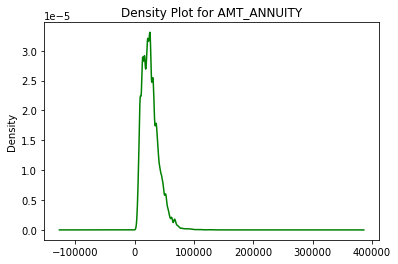

In [19]:
# Taking One of Numerical Example of Density Plot

app_train.AMT_ANNUITY.plot.density(color='green')
plt.title('Density Plot for AMT_ANNUITY')
plt.show()

# The Data showed that it is right Skewed Distribution

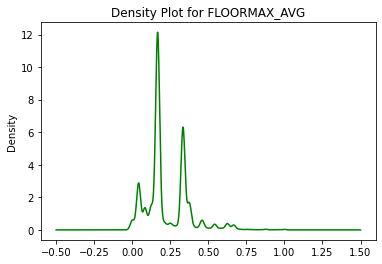

In [20]:
# Taking One of Numerical Example of Density Plot

app_train.FLOORSMAX_AVG.plot.density(color='green')
plt.title('Density Plot for FLOORMAX_AVG')
plt.show()

# The Data showed that it is right Skewed Distribution

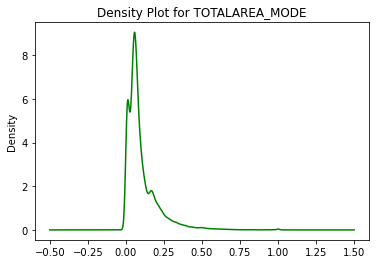

In [21]:
app_train.TOTALAREA_MODE.plot.density(color='green')
plt.title('Density Plot for TOTALAREA_MODE')
plt.show()

# The Data showed that it is Right Skewed Distribution

In [22]:
# Fill in the NA data with mode for categorical data and median for numerical data

category_columns = app_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = app_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in app_train:
    if app_train[column].isnull().any():
        if(column in category_columns):
            app_train[column]=app_train[column].fillna(app_train[column].mode()[0])
        else:
            app_train[column]=app_train[column].fillna(app_train[column].median())

In [23]:
# Check NA data

print(app_train.isnull().sum())

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [24]:
# Labeling data for categories
app_train = app_train.apply(LabelEncoder().fit_transform)

In [25]:
# See top data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,1,0,1,0,1754,1191,4588,189,6,7,4,3,1,63,15684,11935,12039,4047,1,1,0,1,1,0,8,0,1,1,6,10,0,0,0,0,0,0,5,28072,287,228,38,164,2,188,4,149,0,2,2,2,2,2638,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,2064,4338,6985,704,1,4,1,1,1,11,8382,11384,14501,5876,1,1,0,1,1,0,3,1,0,0,1,11,0,0,0,0,0,0,39,85078,559,254,191,190,7,214,14,714,0,1,0,1,0,2944,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,0,338,228,662,30,6,7,4,3,1,47,6101,12347,11427,3636,1,1,1,1,1,0,8,0,1,1,1,9,0,0,0,0,0,0,11,72830,677,247,103,183,4,207,8,688,0,0,0,0,0,2957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,1,0,1170,836,5680,145,6,7,4,0,1,34,6142,9533,5854,3730,1,1,0,1,0,0,8,1,1,1,6,17,0,0,0,0,0,0,5,90558,559,247,103,183,4,207,8,688,0,2,0,2,0,3155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,1,0,1,0,1,0,1019,1635,3960,352,6,7,4,3,1,74,5215,9534,11376,2709,1,1,0,1,0,0,3,0,1,1,4,11,0,0,0,0,1,1,37,36020,559,247,103,183,4,207,8,688,0,0,0,0,0,2666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#  Correlation pearson each features

corr_=app_train.corr(method='pearson', min_periods=1)
pd.DataFrame(corr_).style.background_gradient(cmap='coolwarm')

In [27]:
# Divide training data into 2 categoris: 
# droptarget for training data wihout target variables and onlytarget for training data with only target variable.

droptarget = app_train.drop(['TARGET'], axis=1)
onlytarget = app_train['TARGET']

# feature selection with 5 signifies of features  
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(droptarget,onlytarget)

data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(droptarget.columns)

var_Scores = pd.concat([data_columns, data_scores], axis = 1)
var_Scores.columns = ['Variables', 'Chi Square Score']

var_Scores.sort_values(by=['Chi Square Score'], ascending=False)

,Variables,Chi Square Score
39,EXT_SOURCE_2,1.002043e+08
16,DAYS_BIRTH,3.933841e+06
18,DAYS_REGISTRATION,6.223849e+05
19,DAYS_ID_PUBLISH,5.845628e+05
17,DAYS_EMPLOYED,3.105933e+05
7,AMT_CREDIT,2.378555e+05
53,DAYS_LAST_PHONE_CHANGE,2.280446e+05
40,EXT_SOURCE_3,1.938264e+05
47,TOTALAREA_MODE,1.841211e+05
9,AMT_GOODS_PRICE,7.045457e+04


In [28]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,1,0,1,0,1754,1191,4588,189,6,7,4,3,1,63,15684,11935,12039,4047,1,1,0,1,1,0,8,0,1,1,6,10,0,0,0,0,0,0,5,28072,287,228,38,164,2,188,4,149,0,2,2,2,2,2638,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,2064,4338,6985,704,1,4,1,1,1,11,8382,11384,14501,5876,1,1,0,1,1,0,3,1,0,0,1,11,0,0,0,0,0,0,39,85078,559,254,191,190,7,214,14,714,0,1,0,1,0,2944,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,0,338,228,662,30,6,7,4,3,1,47,6101,12347,11427,3636,1,1,1,1,1,0,8,0,1,1,1,9,0,0,0,0,0,0,11,72830,677,247,103,183,4,207,8,688,0,0,0,0,0,2957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,1,0,1170,836,5680,145,6,7,4,0,1,34,6142,9533,5854,3730,1,1,0,1,0,0,8,1,1,1,6,17,0,0,0,0,0,0,5,90558,559,247,103,183,4,207,8,688,0,2,0,2,0,3155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,1,0,1,0,1,0,1019,1635,3960,352,6,7,4,3,1,74,5215,9534,11376,2709,1,1,0,1,0,0,3,0,1,1,4,11,0,0,0,0,1,1,37,36020,559,247,103,183,4,207,8,688,0,0,0,0,0,2666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Splitting tha data. Droptarge as X and onlytarget as Y

X_train, X_test, y_train, y_test = train_test_split(droptarget, onlytarget, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(246008, 80) (61503, 80)


In [30]:
# Logistic Regression Model
## Training the model
from sklearn.metrics import classification_report
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)

# Predict the y train data
y_train_pred_log_model = log_reg_model.predict(X_train)



In [31]:
# Print Summary of Logistic Regresion Model
from sklearn.metrics import confusion_matrix
print('Report Summary of Logistic Regression Model for Training Data:')
print(classification_report(y_train, y_train_pred_log_model))

# Since, the value is 0.96, it is very close to 1, 
# It is tell us that the model does a good job of predicting.

Report Summary of Logistic Regression Model for Training Data:
              precision    recall  f1-score   support

           0       0.43      0.01      0.02     19876
           1       0.92      1.00      0.96    226132

    accuracy                           0.92    246008
   macro avg       0.67      0.50      0.49    246008
weighted avg       0.88      0.92      0.88    246008



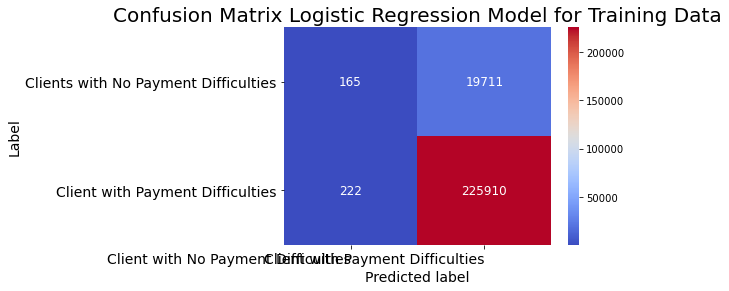

In [32]:
# Form Confusion Matrix  to define the performance of a classification algorithm.
confusion_matrix_log_model = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log_model)), 
                                    ('Clients with No Payment Difficulties', 'Client with Payment Difficulties'), 
                                    ('Client with No Payment Difficulties', 'Client with Payment Difficulties'))

# Plot The Confusion Matrix
plt.figure()

## Annot Fuction to show the number & fmt to add string (s = string, d = decimal) &
heatmap = sns.heatmap(confusion_matrix_log_model, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Logistic Regression Model for Training Data', fontsize=20, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()



In [33]:
# predict data test
y_test_pred_log_model = log_reg_model.predict(X_test)

# print classification report
print('Report Summary of Logistic Regression Model for Testing data:')
print(classification_report(y_test, y_test_pred_log_model))

# Since, the value is 0.96, it is very close to 1, 
# It is tell us that the model does a good job of predicting.





Report Summary of Logistic Regression Model for Testing data:
              precision    recall  f1-score   support

           0       0.45      0.01      0.02      4949
           1       0.92      1.00      0.96     56554

    accuracy                           0.92     61503
   macro avg       0.69      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



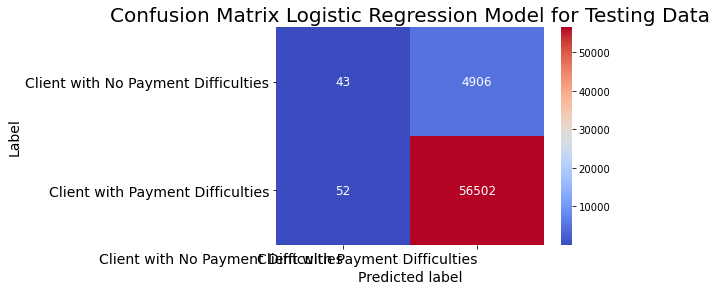

In [34]:
# form confusion matrix as a dataFrame
confusion_matrix_log_test_model = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log_model)), 
                                    ('Client with No Payment Difficulties', 'Client with Payment Difficulties'), 
                                    ('Client with No Payment Difficulties', 'Client with Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log_test_model, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Logistic Regression Model for Testing Data', fontsize=20, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [35]:
score_reglog_train=round(log_reg_model.score(X_train,y_train)*100,2)
score_reglog_test=round(log_reg_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(score_reglog_train))
print("Test Accuracy: % {}".format(score_reglog_test))

# The ROC AUC score tells us how efficient the model is. 
#The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. 
roc_auc_log_model = round(roc_auc_score(y_test, y_test_pred_log_model),4)
print('ROC AUC:', roc_auc_log_model)

Training Accuracy: % 91.9
Test Accuracy: % 91.94
ROC AUC: 0.5039


In [36]:
# Gaussian Naive Bayes
## Training  the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

# Preditcing data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Summary of Gaussian Naive Bayes for Training Model:')
print(classification_report(y_train, y_train_pred_gnb))

# Since, the value is 0.94, it is very close to 1, 
# It is tell us that the model does a good job of predicting.


GaussianNB()
Summary of Gaussian Naive Bayes for Training Model:
              precision    recall  f1-score   support

           0       0.25      0.21      0.23     19876
           1       0.93      0.95      0.94    226132

    accuracy                           0.89    246008
   macro avg       0.59      0.58      0.58    246008
weighted avg       0.88      0.89      0.88    246008



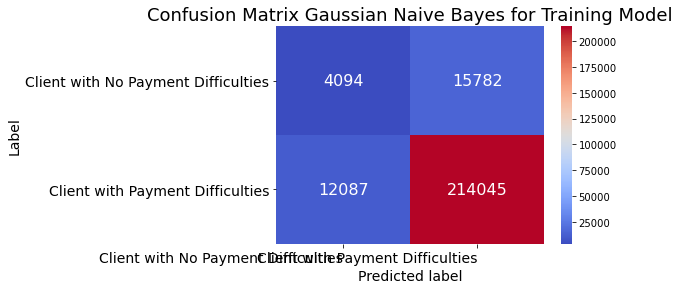

In [37]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), 
                                    ('Client with No Payment Difficulties', 'Client with Payment Difficulties'), 
                                    ('Client with No Payment Difficulties', 'Client with Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 16}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Gaussian Naive Bayes for Training Model', fontsize=18, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()



Summary Gaussian Naive Bayes for Testing Model:
              precision    recall  f1-score   support

           0       0.26      0.21      0.23      4949
           1       0.93      0.95      0.94     56554

    accuracy                           0.89     61503
   macro avg       0.59      0.58      0.59     61503
weighted avg       0.88      0.89      0.88     61503



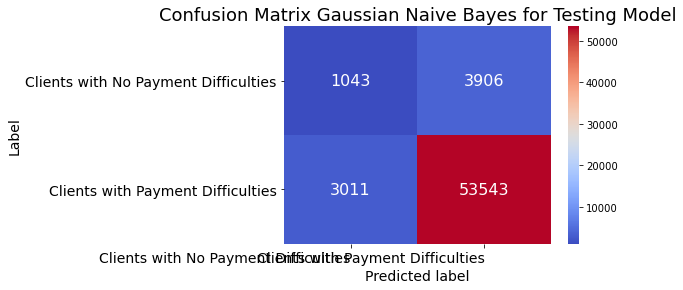

In [38]:
# Predicting data test
y_test_pred_gnb = gnb_model.predict(X_test)

# Print classification report
print('Summary Gaussian Naive Bayes for Testing Model:')
print(classification_report(y_test, y_test_pred_gnb))

# Form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), 
                                    ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'), 
                                    ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 16}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Gaussian Naive Bayes for Testing Model', fontsize=18, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Since, the value is 0.89, it is very close to 1, 
# It is tell us that the model does a good job of predicting.



In [39]:
roc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
roc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(roc_gnb_train))
print("Test Accuracy: % {}".format(roc_gnb_test))

# ROC scores
roc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_gnb)

Training Accuracy: % 88.67
Test Accuracy: % 88.75
ROC AUC: 0.5788


DecisionTreeClassifier()
Summary Decision Tree Classifier for Training Model :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19876
           1       1.00      1.00      1.00    226132

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



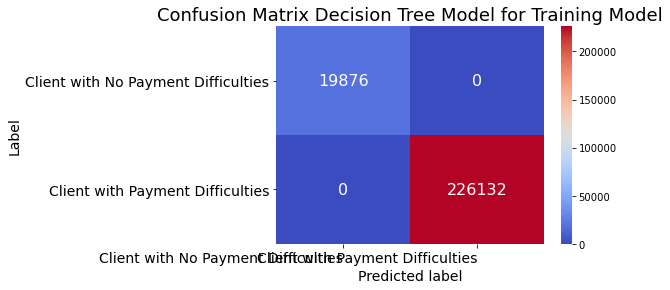

In [40]:
# Decision Tree
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)


# predicting training data
y_train_pred_dt = dt_model.predict(X_train)

# print summary
print('Summary Decision Tree Classifier for Training Model :')
print(classification_report(y_train, y_train_pred_dt))

# Form confusion matrix 
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), 
                                   ('Client with No Payment Difficulties', 'Client with Payment Difficulties'), 
                                   ('Client with No Payment Difficulties', 'Client with Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 16}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Decision Tree Model for Training Model', fontsize=18, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Since, the value is 1,
# It is tell us that the model does a good job of predicting.




Summary Decision Tree Classifier for Testing Model:
              precision    recall  f1-score   support

           0       0.14      0.16      0.15      4949
           1       0.93      0.91      0.92     56554

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.53     61503
weighted avg       0.86      0.85      0.86     61503



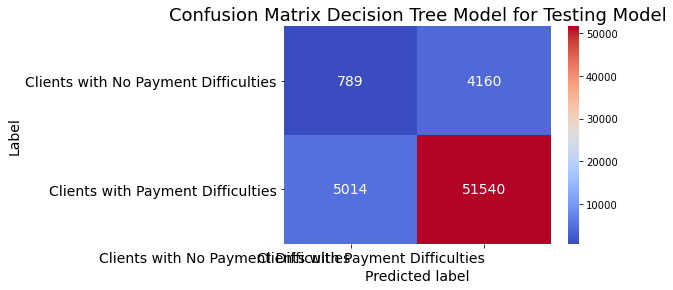

In [41]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Summary Decision Tree Classifier for Testing Model:')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), 
                                   ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'), 
                                   ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Decision Tree Model for Testing Model', fontsize=18, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Since, the value is 0.92,
# It is tell us that the model does a good job of predicting.


In [42]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

Training Accuracy: % 100.0
Test Accuracy: % 85.08
ROC AUC: 0.5354


In [43]:
# Random Forest
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)
# predict data train
y_train_pred_dt = rf_model.predict(X_train)




RandomForestClassifier()


Summary of Decision Tree model for  Training Model :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19876
           1       1.00      1.00      1.00    226132

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



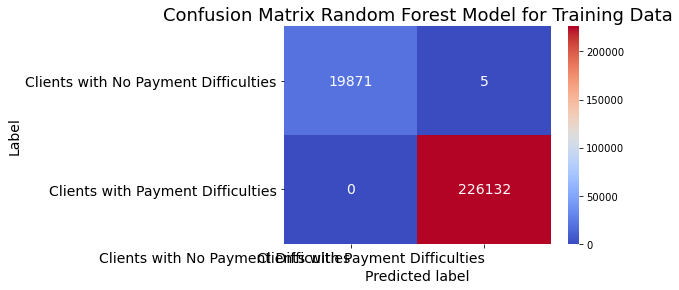

In [44]:
# print classification report
print('Summary of Decision Tree model for  Training Model :')
print(classification_report(y_train, y_train_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), 
                                   ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'), 
                                   ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'))
confusion_matrix_rf

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Random Forest Model for Training Data', fontsize=18, color='black')
plt.ylabel('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Since, the value is 1,
# It is tell us that the model does a good job of predicting.


Summary Random Forest Model for  Testing Model :
              precision    recall  f1-score   support

           0       0.41      0.00      0.00      4949
           1       0.92      1.00      0.96     56554

    accuracy                           0.92     61503
   macro avg       0.67      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



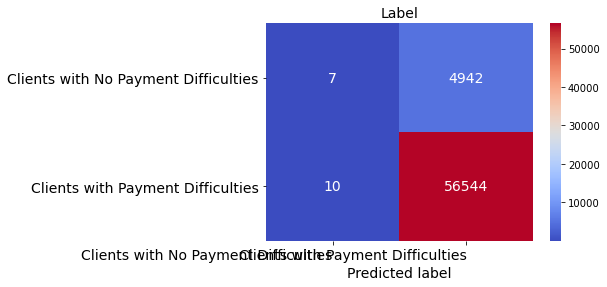

In [45]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)


# print classification report
print('Summary Random Forest Model for  Testing Model :')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), 
                                   ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'), 
                                   ('Clients with No Payment Difficulties', 'Clients with Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


# Since, the value is 0.96,
# It is tell us that the model does a good job of predicting.



In [46]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))


# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

Training Accuracy: % 100.0
Test Accuracy: % 91.95
ROC AUC: 0.5006


In [47]:
app_test.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
                'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
                'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG',
                'LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
                'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE',
                'LANDAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE',
                'EXT_SOURCE_1','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI',
                'ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE',
                'APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI',
                'ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE',
                'LIVINGAREA_MEDI','HOUSETYPE_MODE'], inplace=True, axis=1)

In [48]:
# Prediction
# data application (test)

category_columns = app_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = app_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in app_test:
    if app_test[column].isnull().any():
        if(column in category_columns):
            app_test[column]=app_test[column].fillna(app_test[column].mode()[0])
        else:
            app_test[column]=app_test[column].fillna(app_test[column].median())


In [49]:
print(app_test.isnull().sum())

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

In [50]:
app_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE",'EMERGENCYSTATE_MODE']] = app_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE",'EMERGENCYSTATE_MODE']].apply(LabelEncoder().fit_transform)

In [51]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170,-812,1,1,0,1,0,1,8,2,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.9732,0.1250,0.9732,0.1250,0.9732,0.1250,0.0392,0,0.0,0.0,0.0,0.0,-1740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118,-1623,1,1,0,1,0,0,9,2,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175,-3503,1,1,0,1,0,0,4,2,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,0,0.0,0.0,0.0,0.0,-856,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000,-4208,1,1,0,1,1,0,14,4,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.9970,0.3750,0.9970,0.3750,0.9970,0.3750,0.3700,0,0.0,0.0,0.0,0.0,-1805,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000,-4262,1,1,1,1,0,0,8,3,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,0,0.0,0.0,0.0,0.0,-821,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [52]:
# From Model above, we decide to use :
results = pd.DataFrame([["Logistic Regression", 0.919, 0.9194, 0.5039],["Gaussian Naive Bayes", 1, 0.851, 0.5349],
                       ["Random Forest", 1, 0.9195, 0.5007]],
                       columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
2,Random Forest,1.000000,0.919500,0.500700
1,Gaussian Naive Bayes,1.000000,0.851000,0.534900
0,Logistic Regression,0.919000,0.919400,0.503900


In [53]:
# lets predict!
predict = pd.Series(rf_model.predict(app_test), name = "TARGET").astype(int)
results = pd.concat([app_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("Downloads/exam/home-credit-default-risk/predict application.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,1
3,100028,1
4,100038,1
